In [ ]:
#TODO
# 1. 3D
# 1-1 Training image construction 2D -> 3D 
# 2. HARD DATA CONDITIONING


In [30]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled
TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
TI_3D = np.concatenate([TI for _ in range(10)], axis=2)  # (250, 250, 10)
TI_3D.shape

(250, 250, 10)

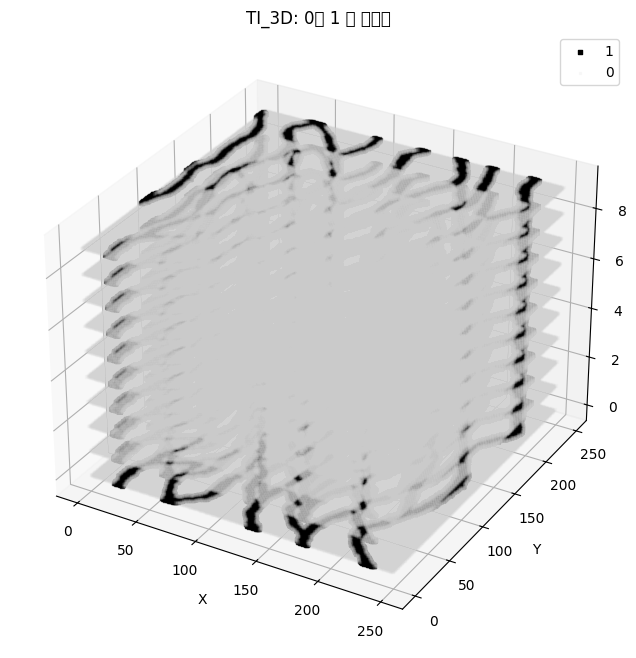

In [36]:
# 값이 0 또는 1인 위치 좌표 추출
x_1, y_1, z_1 = np.where(TI_3D == 1)
x_0, y_0, z_0 = np.where(TI_3D == 0)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 값이 1인 점: 검은색
ax.scatter(x_1, y_1, z_1, c='black', marker='s', s=10, label='1')

# 값이 0인 점: 회색
ax.scatter(x_0, y_0, z_0, c='lightgray', marker='s', s=3, alpha=0.1, label='0')

# 축과 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('TI_3D: 0과 1 값 시각화')
ax.legend()
plt.show()


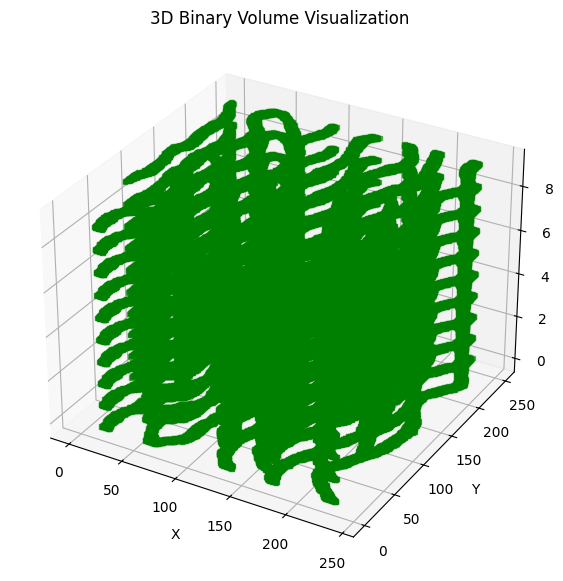

In [28]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 값이 1인 점만 표시
x, y, z = np.where(TI_3D == 1)

ax.scatter(x, y, z, c='green', marker='s', s=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Binary Volume Visualization')

plt.show()


Text(0.5, 1.0, '7771')

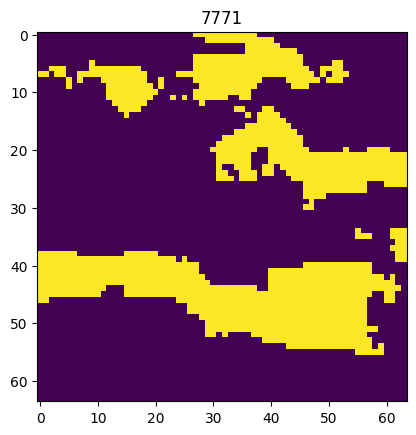

In [53]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, hard_data = None, verbose = None)
plt.imshow(real)
plt.title(f'{random_seed}')

Text(0.5, 1.0, '7771')

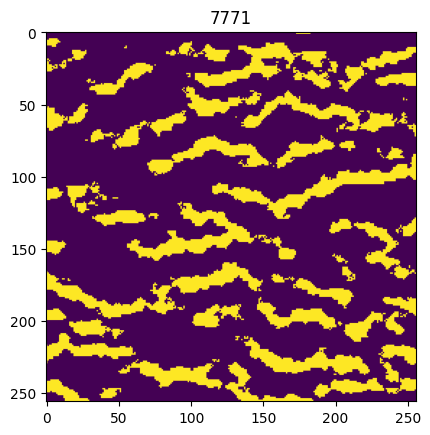

In [ ]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 256, 256, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, hard_data = None, verbose = None)
plt.imshow(real)
plt.title(f'{random_seed}')

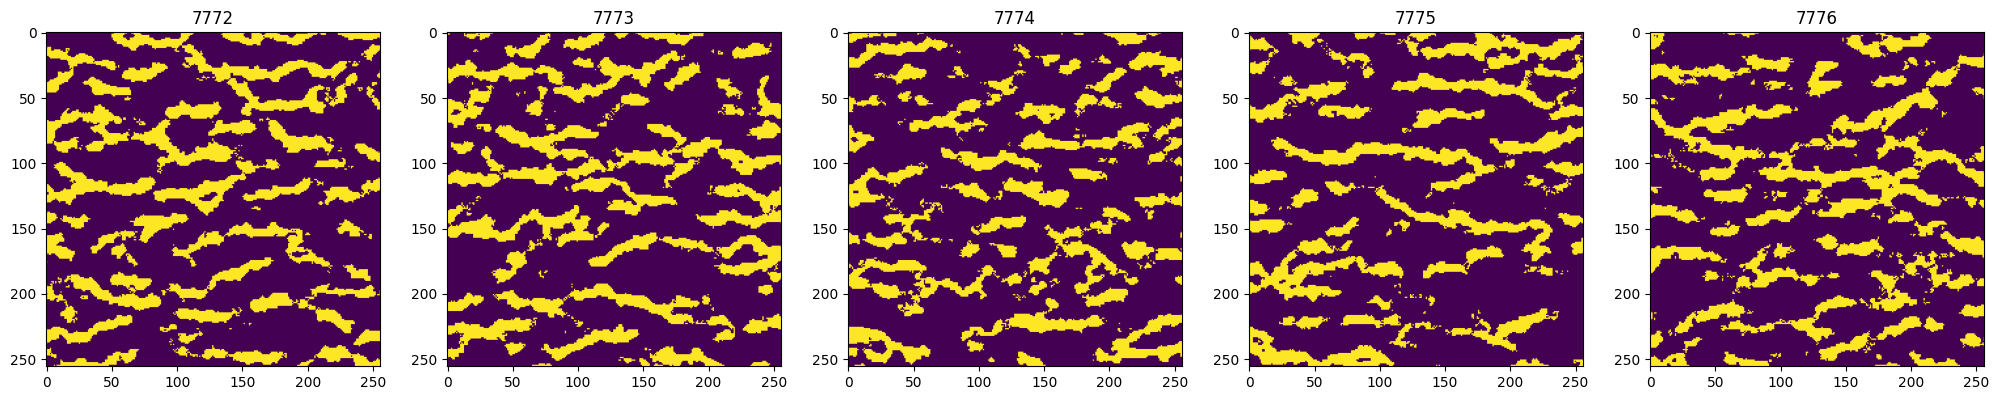

In [61]:
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 256, 256, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4

plt.figure(figsize = (25, 25))
for i in range(5):
    random_seed += 1
    real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz, hard_data = None, verbose = None)    
    plt.subplot(1,5, i+1)
    plt.imshow(real)
    plt.title(f'{random_seed}')

Text(0.5, 1.0, '7771')

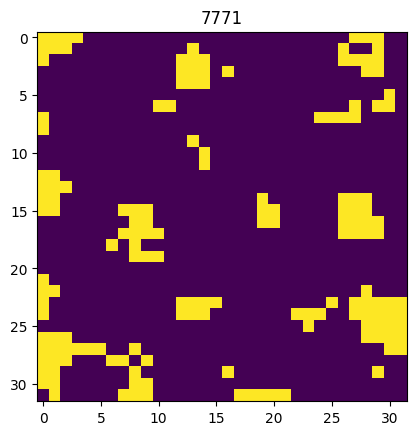

In [32]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, verbose=False)
plt.imshow(real)
plt.title(f'{random_seed}')

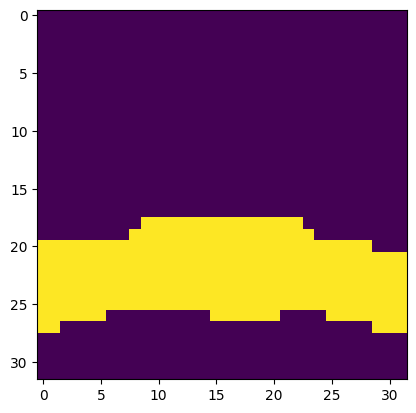

In [33]:
plt.imshow(TI[:32, :32])

In [34]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

Text(0.5, 1.0, '7771')

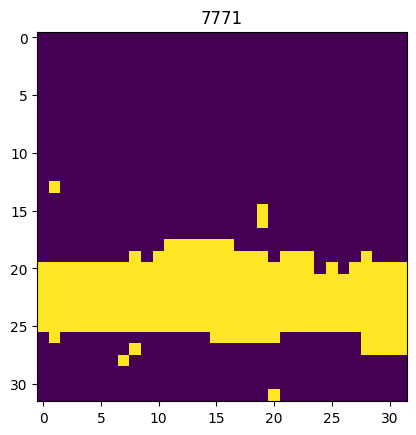

In [35]:
##########################################
##  original demo for 128x128x1         ##
##########################################

random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, soft_data=soft_data)
plt.imshow(real)
plt.title(f'{random_seed}')